In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('presentation')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

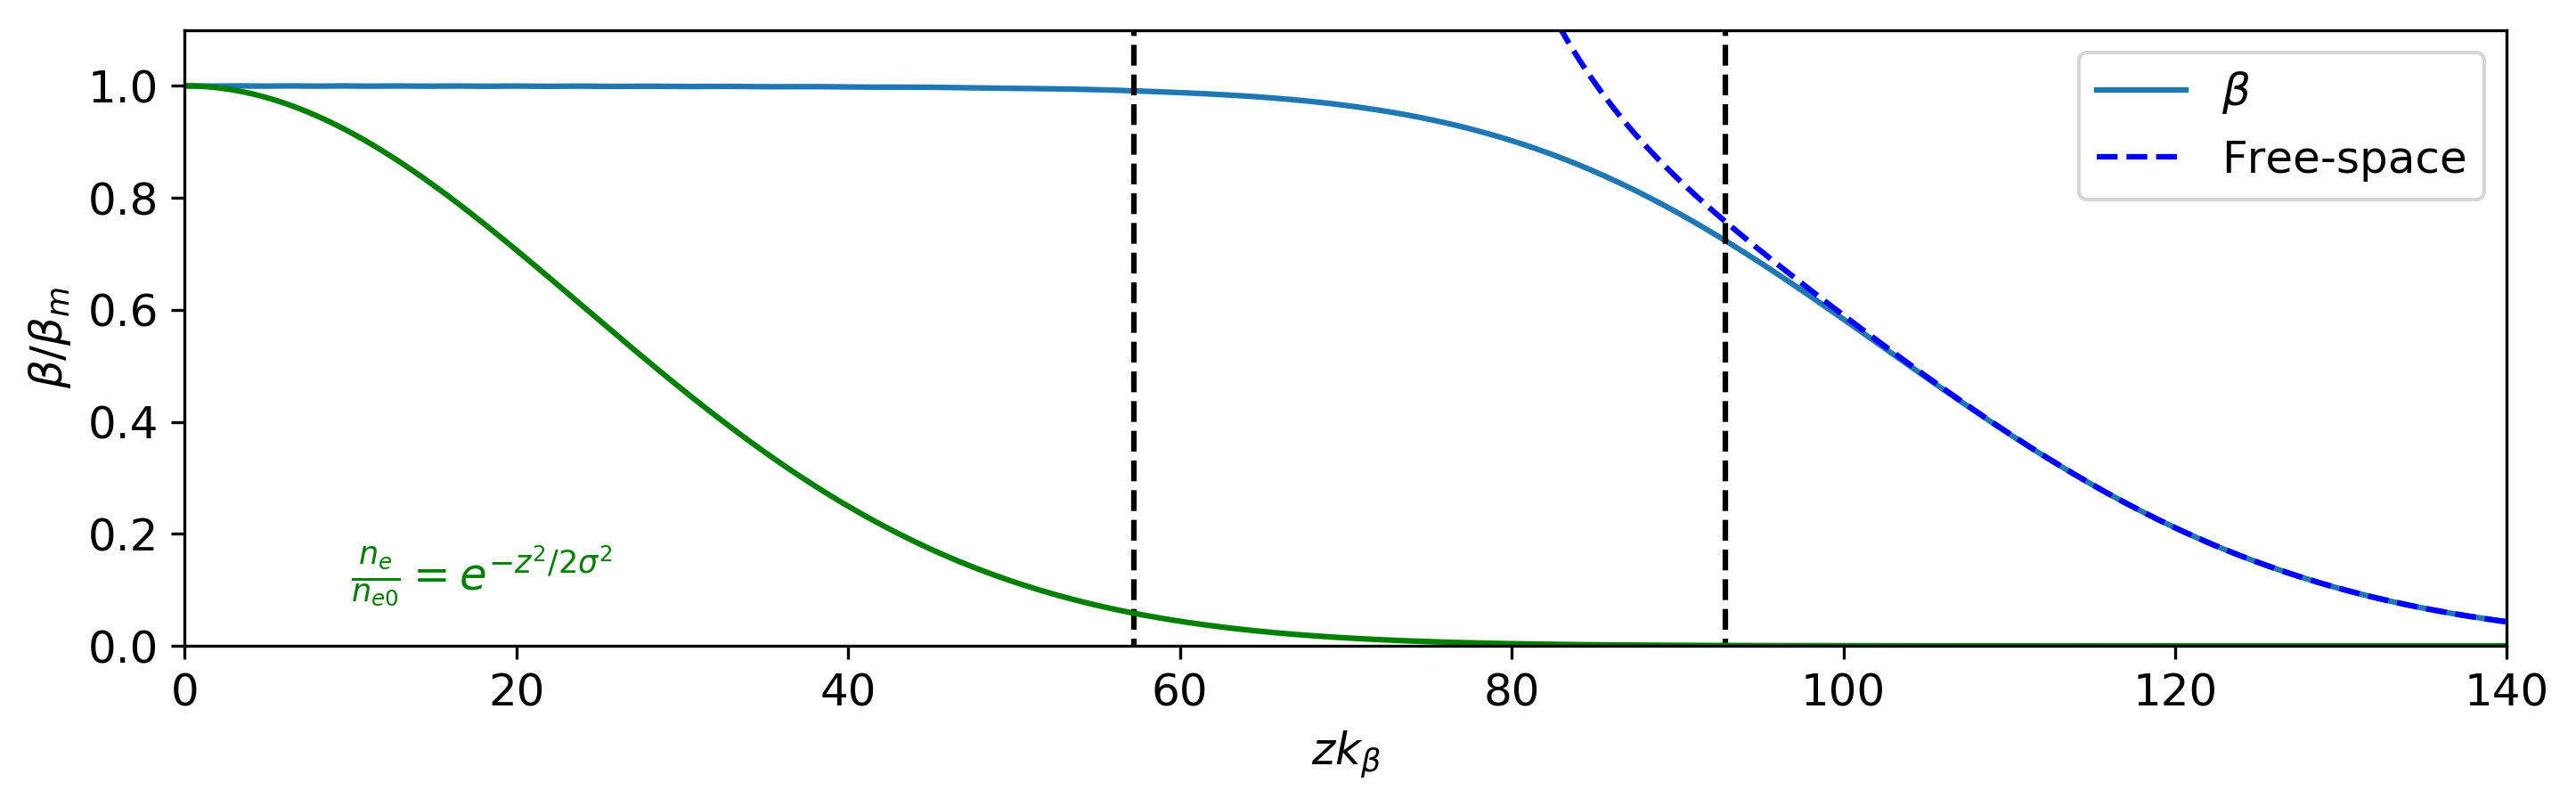

In [2]:
N = 10000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24
z = np.linspace(0, 250, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

tran = 0.85
# Transition to perturbed propagation
tran1 = z[-np.array(alpha)<=tran][-1]

tran = 0.1
# Transition from adiabatic propagation
tran2 = z[-np.array(alpha)<=tran][-1]

# Calculate the free space propagation
bs = 1/gamma[-1]
ss = alpha[-1]*bs + 250
betaFree = (z-ss)**2/bs+bs

# Plotting
#------------------------------------------------------------------------------------
mult = np.sqrt(frac)
#mult2 = np.sqrt(fracTran)
#mult = 1
#mult2 = 1

plt.figure(figsize=(9.8, 3.18), dpi=300)

# Plot beam evolution 
plt.plot(z, np.array(beta)*mult)
plt.plot(z, betaFree*mult, 'b--')
#plt.plot(z, 1/np.sqrt(frac), 'b--')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta/\beta_m$')
plt.legend([r'$\beta$', 'Free-space', r'Transition'], loc=1)
plt.ylim(0.0, 1.1)
#plt.yscale('log')

# Plot transition points
plt.plot([tran1, tran1], [-1, 1e4], 'k--')
plt.plot([tran2, tran2], [-1, 1e4], 'k--')

# Plot plasma density
#plt.twinx()
plt.plot(z, frac, 'g')
plt.text(10, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2\sigma^2}$', color='green',fontsize=12)
#plt.ylim(0.0, 1.1)
plt.xlim(0, 140)
#plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
#plt.yscale('log')
plt.tight_layout()
plt.savefig('Gaussian_Beam_Evolution.svg')
plt.show()

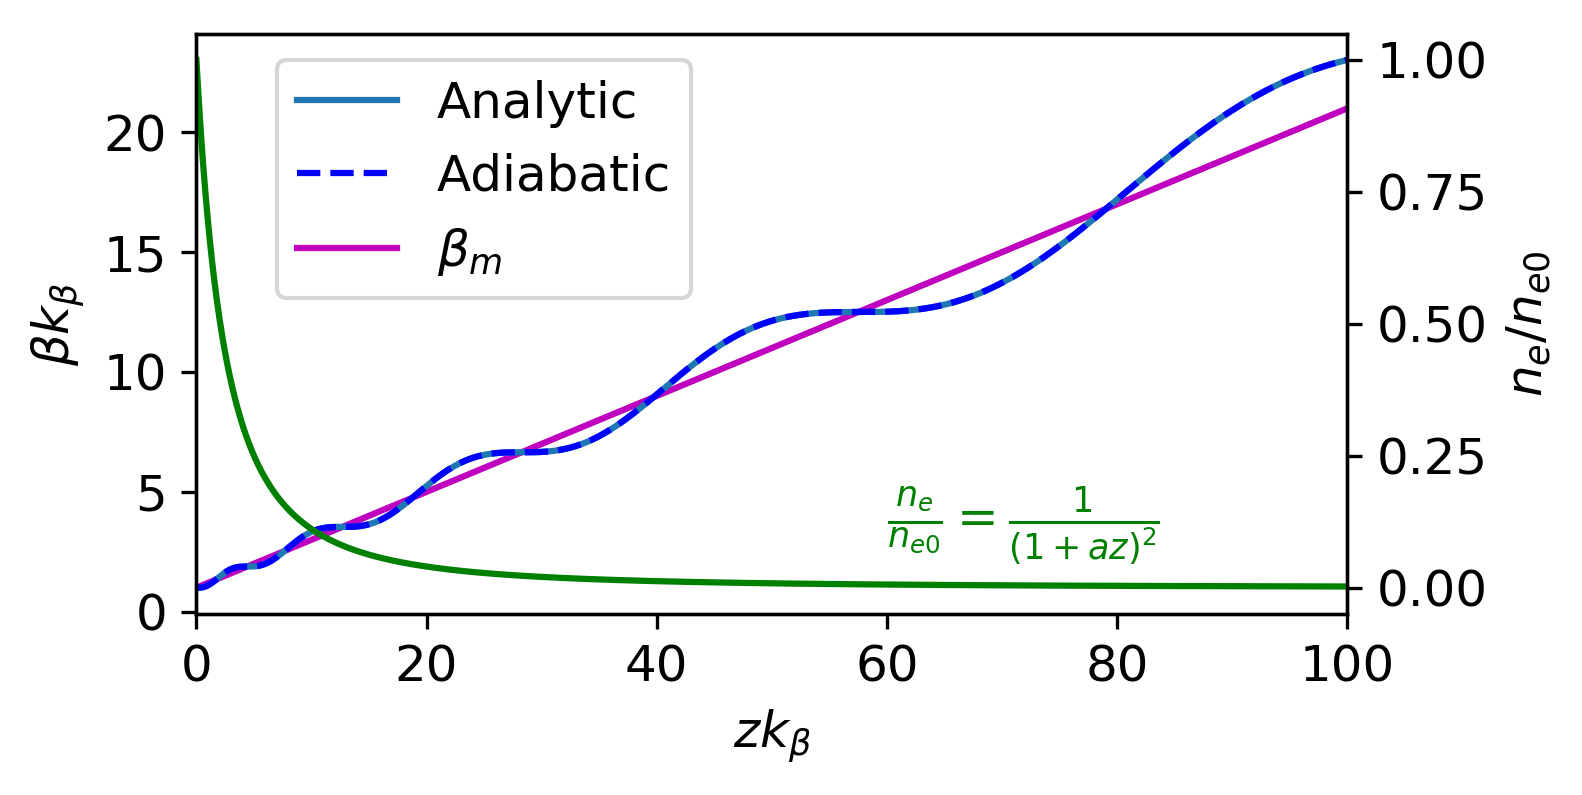

In [3]:
# Possible incoming beams for an adiabatic focuser
N = 5000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.2
z = np.linspace(0, 100, N)
frac = 1/(1+a*z)**2
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

Delta = a/(a-2)

plt.figure(figsize=(5.33, 2.81), dpi=300)
plt.plot(z, beta)
plt.plot(z, (1+a*z)*(1+1/(4/a**2-1)-1/(4/a**2-1)*np.cos(np.log(1+a*z)*np.sqrt(4/a**2-1))
                     -1/np.sqrt(4/a**2-1)*np.sin(np.log(1+a*z)*np.sqrt(4/a**2-1))), 'b--')
plt.plot(z, 1/np.sqrt(frac), 'm', zorder=1)
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta$')
plt.legend([r'Analytic', r'Adiabatic', r'$\beta_m$'], bbox_to_anchor=(.25, .75), loc='center')
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(60, 0.1, r'$\frac{n_e}{n_{e0}}=\frac{1}{(1+az)^2}$', color='green', fontsize=12)
plt.ylim(-0.05, 1.05)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('Adiabatic_Evolution.svg')
plt.show()

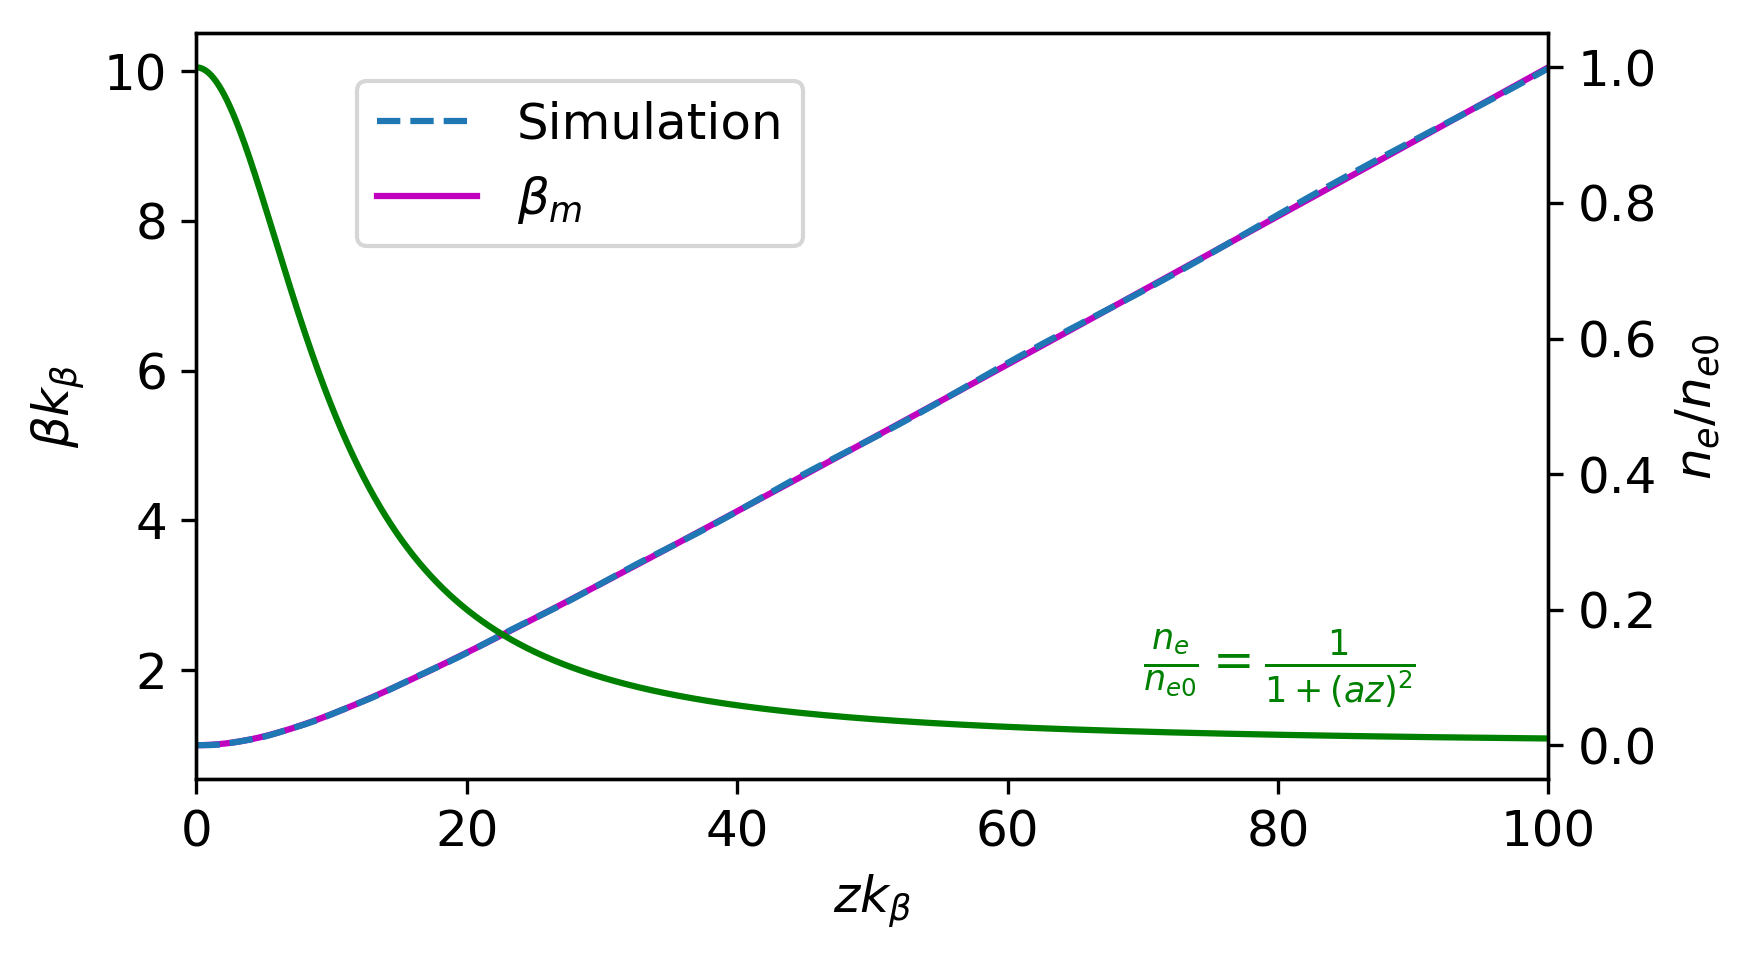

In [4]:
N = 5000
beta0 = 1.0
alpha0 = 0.0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.1
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

plt.figure(figsize=(6, 3.36), dpi=300)
plt.plot(z, beta, '--')
#plt.plot(z, analytic, 'b--')
plt.plot(z, 1/np.sqrt(frac), 'm', zorder=1)
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta$')
plt.legend([r'Simulation', r'$\beta_m$'], bbox_to_anchor=(.1, 1.02, 1., -.05))
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(70, 0.1, r'$\frac{n_e}{n_{e0}}=\frac{1}{1+(az)^2}$', color='green', fontsize=12)
plt.ylim(-0.05, 1.05)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('Smooth_Adiabatic_Evolution.svg')
plt.show()

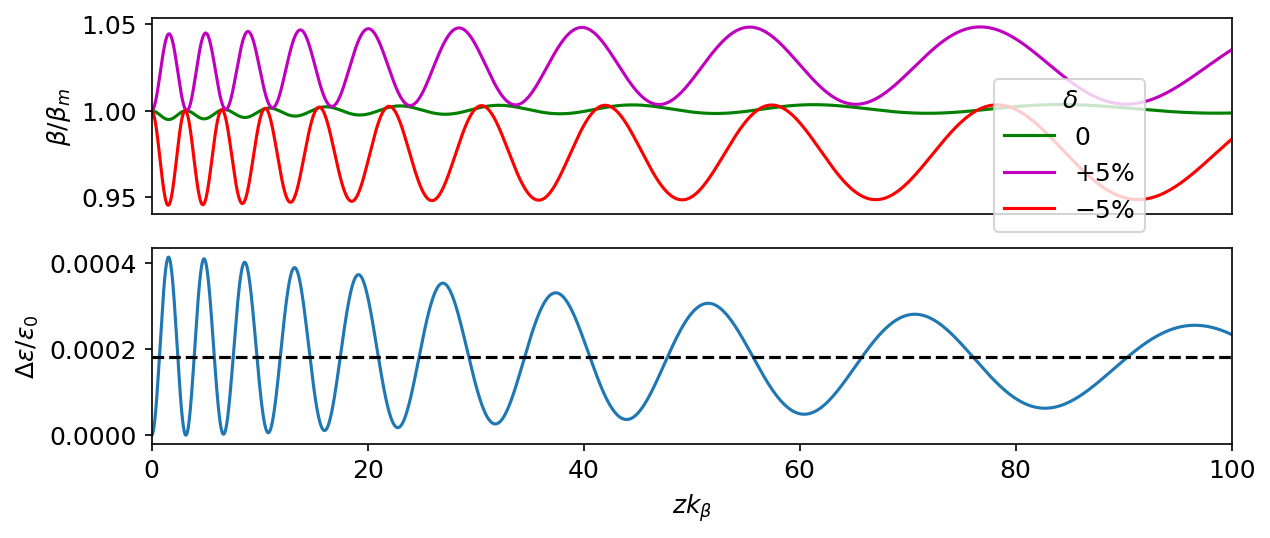

In [5]:
# The complicated emittance growth and chromatic beam evolution plot
N = 5000
beta0 = 1.0
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.1
z = np.linspace(0, 100, N)
frac = 1/(1+(a*z)**2)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*1.05, dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*0.95, dgdz0, ne0)

betam = 1/np.sqrt(frac)
#betam = 1

# Calculate the emittance growth
M = 500
delta = np.linspace(-0.05, 0.05, M)
gb0A = 20000*(1+delta)
betaDelta = np.zeros((M, N), dtype='double')
alphaDelta = np.zeros((M, N), dtype='double')
gammaDelta = np.zeros((M, N), dtype='double')
for i in range(M):
    betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0, alpha0, gb0A[i],
                                                                                  dgdz0, ne0)
    
betaP = np.average(betaDelta, axis=0)
alphaP = np.average(alphaDelta, axis=0)
gammaP = np.average(gammaDelta, axis=0)
eps = np.sqrt(betaP*gammaP-alphaP**2)
avgeps = np.average(eps)

# Plotting
#------------------------------------------------------------------------------------
plt.figure(figsize=(8.63, 3.75), dpi=150)
gs = gridspec.GridSpec(2, 1)

# Plot of the beam evolution
ax = plt.subplot(gs[0, 0])
plt.plot(z, np.array(beta)/betam, 'g')
plt.plot(z, np.array(beta1)/betam, 'm')
plt.plot(z, np.array(betan1)/betam, 'r')
plt.plot()
ax.get_xaxis().set_visible(False)
plt.ylabel(r'$\beta/\beta_m$')
plt.legend([r'$0$', r'$+5\%$', r'$-5\%$'], title=r'$\delta$',
           bbox_to_anchor=(0.85, 0.3), loc='center')
plt.xlim(0,100)

# Plot of the emittance growth
plt.subplot(gs[1, 0])
plt.plot(z, eps-1)
plt.plot([0, 100], [avgeps-1, avgeps-1], 'k--')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\Delta\epsilon/\epsilon_0$')
plt.xlim(0, 100)
#plt.ylim(0.999995, 1.00002)

plt.tight_layout()
plt.savefig('Chromatic_Adiabatic.svg')
plt.show()

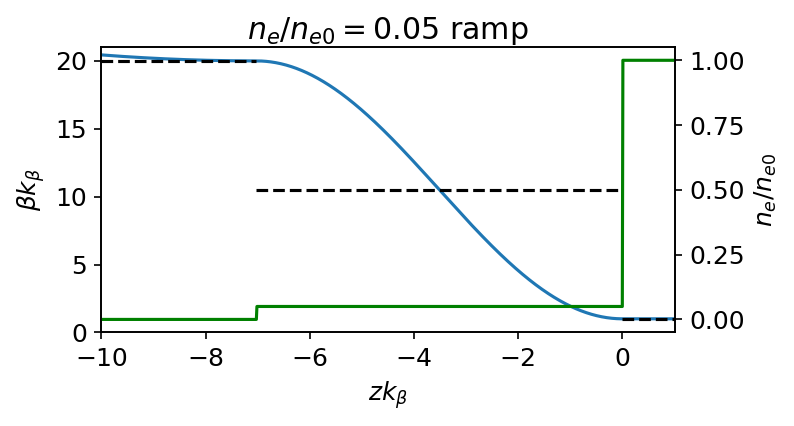

In [6]:
# Lets plot some example square ramps
theta = lambda s: 2*np.sqrt(eta)*s
betaA = lambda s: np.real((B0/2-(a0**2+1)/eta/B0/2+1j*a0/np.sqrt(eta))*np.exp(1j*theta(s))
                          + (B0/2+(a0**2+1)/eta/B0/2))
betaD = lambda s: B0+s**2/B0

N = 1000
B0 = 20
a0 = 0
eta = 0.05
L = np.pi/(2*np.sqrt(eta))
s = np.linspace(-10, 1, N)
sel = [s < -L, (s >= -L) & (s < 0), s >= 0]
ne = np.piecewise(s, sel, [0, eta, 1.0])
beta = np.zeros(N)
beta[sel[0]] = betaD(s[sel[0]]+L)
beta[sel[1]] = betaA(s[sel[1]]+L)
beta[sel[2]] = 1.0
center = (B0/2+(a0**2+1)/eta/B0/2)

plt.figure(figsize=(5.35, 3), dpi=150)
plt.plot(s, beta)
plt.plot([-10, -L], [B0, B0], 'k--')
plt.plot([-L, 0.0], [center, center], 'k--')
plt.plot([0.0, 1.0], [1.0, 1.0], 'k--')
plt.title(r'$n_{e}/n_{e0}=0.05$ ramp')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta$')
plt.ylim(0.0, 21)
plt.twinx()
plt.plot(s, ne, 'g')
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlim(-10, 1)
plt.tight_layout()
plt.savefig('Box_Ramp.svg')
plt.show()

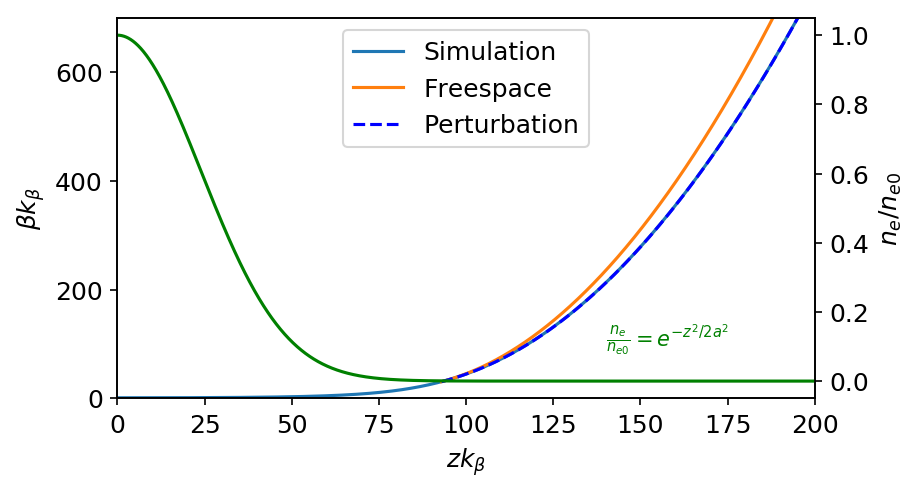

In [7]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24
z = np.linspace(0, 200, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

cutoff = .85

zTran = z[-np.array(alpha)>cutoff]
fracTran = frac[-np.array(alpha)>cutoff]
neTran = np.zeros(len(zTran))
tran1 = z[-np.array(alpha)<=cutoff][-1]
betaTran = np.array(beta)[-np.array(alpha)<=cutoff][-1]
alphaTran = np.array(alpha)[-np.array(alpha)<=cutoff][-1]
zint = zTran-zTran[0]
dz = zint[1]-zint[0]
I0 = np.cumsum(fracTran)*dz
I1 = np.cumsum(zint*fracTran)*dz
I2 = np.cumsum(zint*zint*fracTran)*dz
gammaTran = (1+alphaTran**2)/betaTran
betas = 1/(gammaTran+2*(alphaTran*I0[-1]-gammaTran*I1[-1]))
M11 = 1-I0*zint+I1
M12 = zint-I1*zint+I2
betaPer = M11**2*betaTran - 2*M11*M12*alphaTran + M12**2*gammaTran


beta2, alpha2, gamma2, gb2 = ecalc.cs_propagation(zTran, neTran, betaTran, alphaTran, gb0, dgdz0, ne0)

plt.figure(figsize=(6, 3.36), dpi=150)
plt.plot(z, beta)
plt.plot(zTran, beta2)
plt.plot(zTran, betaPer, 'b--')
plt.plot([tran1, tran1], [-1, 2], 'k--')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta$')
plt.legend([r'Simulation', 'Freespace', 'Perturbation'], loc=9)
plt.ylim(-0.1, 700)
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(140, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color='green', fontsize=10)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
#plt.yscale('log')
plt.ylim(-0.05, 1.05)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.xlim(0, 200)
plt.savefig('Perturbed_Evolution.svg')
plt.show()